Change FILENAME_DICT in data_tools.load_raw_cluster_data.py

In [1]:
import sys
sys.path.append('../../../../../')

#### Local Plotting Tools ####
from plot_tools.fig_preamble import *
from plot_tools.plot_helper_funcs import cm2inch

#### Matplotlib & Numpy ####
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

############ Saving Commands #########

ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_v0_'
figdata = '../svg/fig_data/paper_v0_'
figname='QIF_correct_Q'

############ Load Data #########
norm_z_states_ = np.load(datapath+'QIF_BayesPredRisk_v_OverSampl_v0_correct_Q.npz')['norm_z_states_']
n_predict = 50
num = 2050
n_train = 2000

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


QKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
Using hardcoded value for n_train at 2000
(24, 1)
QKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
Using hardcoded value for n_train at 2000
(24, 2)
QKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 3
Using hardcoded value for n_train at 2000
(24, 3)
QKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
Using hardcoded value for n_train at 2000
(24, 4)


/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


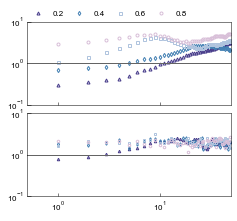

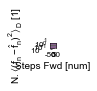

In [2]:
color = [COLOURDICT['QKF'], COLOURDICT['AKF']] # By algorithm
lnstyl = ['^', 'd', 's', 'o']# 'd:']  # By regime 
color_gradient = ['darkslateblue', 'steelblue', 'lightsteelblue', 'thistle']*8 + ['k']
marker_gradient = lnstyl*2 + ['']

case_ratios = [0.2, 0.4, 0.6, 0.8]# , 2.0]

gs = gridspec.GridSpec(2,1,
                       left=0.15, right=0.985, 
                       top=0.92, bottom=0.15, 
                       wspace=0.03, hspace=0.1)

fig = plt.figure(figsize=(cm2inch(8.6),cm2inch(8.)))


# Plot results for QIF where the true dynamical model is completely specified 
# We omit the value at n=0 such that our log plots are well behaved
idx_algo=0
ax_0 = fig.add_subplot(gs[0, 0])

for idx_q_regime in xrange(len(norm_z_states_)-1):

    alpha_gradient = 1.0 - 0.12*idx_q_regime

    vars()['ax_'+str(idx_algo)].plot(np.arange(0, n_predict, 1)[1:], 
                               norm_z_states_[idx_q_regime][idx_algo][n_train : num : 1][1:], 
                               str(lnstyl[idx_q_regime])+'', 
                               label=case_ratios[idx_q_regime], 
                               c=color_gradient[idx_q_regime],
                               markeredgecolor=color_gradient[idx_q_regime],
                               #alpha=alpha_gradient,
                               markerfacecolor="None", ms=3,lw=1)

    
# Plot results for a tuned QKF run on comparable noisetrace
idx_algo=1
ax_1 = fig.add_subplot(gs[1, 0])
test_case=24
variation_scan=[1, 2, 3, 4]
datapath2 = '../../../../DATA_v'+str(ver)+'_/'#temp_3- QIF_BR_MAP_tuned_sigma_v2/'
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)


for idx_c in xrange(len(variation_scan)):
    
    fig_data_name = figdata+figname+'_tc_'+str(test_case)+'_v_'+str(variation_scan[idx_c])+'_correct_Q'
    
    dumpax, ax_1 = pnm(dumpax, ax_1,  ['QKF'], # change RISKDICT
                       test_case, variation_scan[idx_c], 
                       datapath2,
                       fstep=50, sstep=50, lowloss=20, save_data=fig_data_name,
                       ylim = [-1, 1], yscale='log')
idx_c=0
for item in ax_1.lines[::2]:
    item.set_color(color_gradient[idx_c])
    item.set_marker(marker_gradient[idx_c])
    item.set_markeredgecolor(color_gradient[idx_c])
    item.set_markerfacecolor("None")
    item.set_linestyle('')
    idx_c +=1


# Format both plots
for idx_algo in xrange(2):
           
    vars()['ax_'+str(idx_algo)].margins(0.2)
    vars()['ax_'+str(idx_algo)].set(xlabel='', ylabel='')
    vars()['ax_'+str(idx_algo)].set_yscale('log')
    vars()['ax_'+str(idx_algo)].set_xscale('log')
    vars()['ax_'+str(idx_algo)].axhline(1.0,  color=COLOURDICT['DATA'], lw=prediczero_lw, alpha=1.0)
    # vars()['ax_'+str(idx_algo)].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    # vars()['ax_'+str(idx_algo)].yaxis.set_minor_formatter(FormatStrFormatter('%.0f'))   
    vars()['ax_'+str(idx_algo)].tick_params(direction='in', which='both')
    vars()['ax_'+str(idx_algo)] = set_font_sizes(vars()['ax_'+str(idx_algo)], fsize, Fsize)
    vars()['ax_'+str(idx_algo)].yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=2))
    vars()['ax_'+str(idx_algo)].set_ylim([0.1, 10])
    vars()['ax_'+str(idx_algo)].set_xlim([0.5, 50])
    vars()['ax_'+str(idx_algo)].minorticks_off()

ax_0.set_xticklabels('')

ax_0.legend(loc=3,  fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 0.8, .102), 
                     ncol=5, mode="expand", borderaxespad=0.)

fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()